$$
In\;the\;name\;of\;God 
\\HW2\;NeuralNetwork
\\Abbas\;Mohamadiyan\;810898059
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def randcir(X, Y, r): # X & Y represent the center & r is for radius
    while True:
        x = random.random()*2 -1
        y = random.random()*2 -1
        if x*x + y*y < 1:
            return (x*r+X, y*r+Y)
        

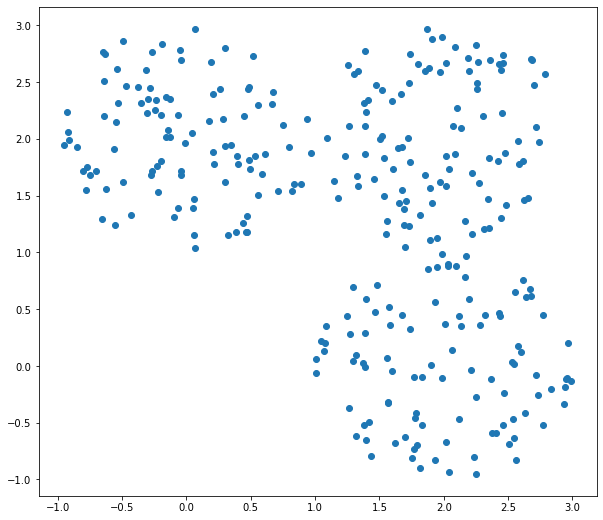

In [3]:
l = []
w = []
y0 = []
for i in range(100):
    x, y = randcir(2, 2, 1)
    l.append(x)
    w.append(y)
    y0.append(0)
    
for i in range(100):
    x, y = randcir(0, 2, 1)
    l.append(x)
    w.append(y)
    y0.append(1)
    
for i in range(100):
    x, y = randcir(2, 0, 1)
    l.append(x)
    w.append(y)
    y0.append(2)
    
plt.figure(figsize=(10,9))    
plt.scatter(l, w)

plt.show()

In [4]:
Dy = np.hstack((l, w, y0))
Dy = np.reshape(Dy, (300, 3), order='F') #the order 'F' was a tough one!
np.random.shuffle(Dy)
D = Dy[:,0:2]
ys = Dy[:,2]
n,d = D.shape
k = 3
Dic = {0:[1,0,0],
       1:[0,1,0],
       2:[0,0,1]}

Y = np.array(list(map(lambda x:Dic[x],ys)))
X = np.hstack((np.ones((n,1)),D))


In [5]:
trsize = int(0.7*n)
vasize = int(0.85*n)
Xt = X[0:trsize, :] ; Yt = Y[0:trsize]
Xv = X[trsize:vasize, :] ; Yv = Y[trsize:vasize]
Xte = X[vasize:n, :] ; Yte = Y[vasize:n]
print(Xt.shape)
print(Xv.shape)
print(Xte.shape)

(210, 3)
(45, 3)
(45, 3)


In [6]:
print(X[209,:] == Xt[209,:])
print(X[210,:] == Xv[0,:])
print(X[255,:] == Xte[0,:])

[ True  True  True]
[ True  True  True]
[ True  True  True]


In [7]:
W0 = np.zeros((k,d+1))
W = W0.copy()

eta,eps = 0.005,1e-4
epoch = 1


while True:
    ii = np.arange(trsize)
    np.random.shuffle(ii)
    for i in ii:
        W[:2] = W0[:2] + eta*((Yt[i]-np.exp(W0@Xt[i])/sum(np.exp(W0@Xt[i]))).reshape((k,1))*Xt[i].reshape((1,d+1)))[:2]
        chg = np.all(abs(W[:2]-W0[:2])) < eps
        W0 = W.copy()
    epoch += 1
    if (chg) | (epoch > 1e3): break
    
print(W.round(3))

[[-5.955 -0.459  6.772]
 [ 2.611 -8.487  6.509]
 [ 0.     0.     0.   ]]


In [8]:
i = 22
(np.exp(W@Xt[i])/sum(np.exp(W@Xt[i]))).round(2),Yt[i]

(array([1., 0., 0.]), array([1, 0, 0]))

$$
sorry
\\I\;ran\;out\;o
$$